In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nx = 100
Nt = 100
x = np.linspace(-5.,5.,Nx)
t = np.linspace(0.,2.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

c = 2.
lambda_ = c*dt/(2*dx)
print(lambda_)

0.1999999999999996


In [3]:
def ui(x):
    return np.exp(-x**2)

In [6]:
def InitT():
    
    u = np.zeros((Nt,Nx))
    
    u[0,:] = ui(x)
    
    return u

In [7]:
u = InitT()

<IPython.core.display.Javascript object>


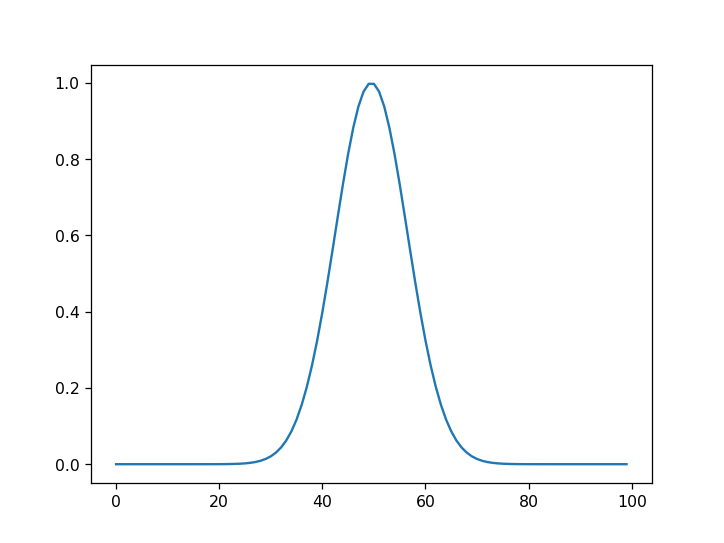

In [9]:
plt.plot(u[0,:])

In [10]:
def GetSolution():
    
    for l in range(1,len(t)):
        
        for i in range(1,len(x)-1):
            
            u[l,i] = u[l-1,i] + lambda_*(u[l-1,i+1] - u[l-1,i-1])

In [11]:
GetSolution()

<IPython.core.display.Javascript object>


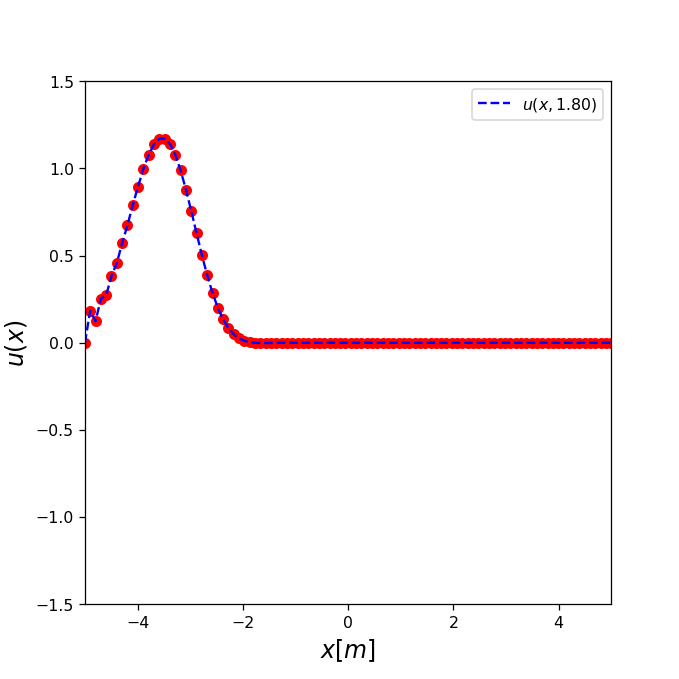

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-1.5,1.5)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,u[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)